In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
df.shape

(1025, 14)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [54]:
df[['age', 'trestbps', 'chol', 'thalach']] = df[['age', 'trestbps', 'chol', 'thalach']].astype(float)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 112.2 KB


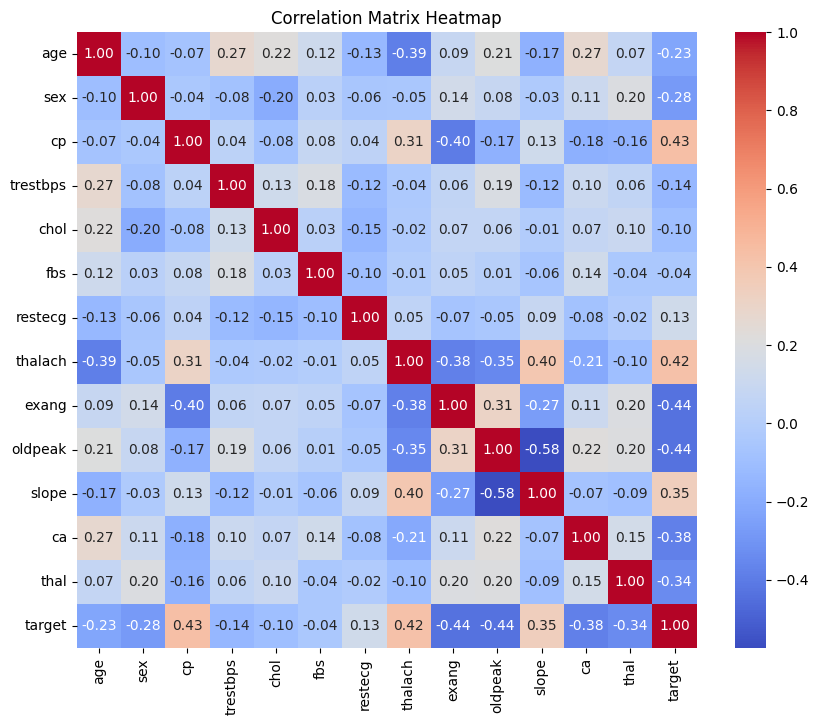

In [56]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 112.2 KB


### Data Distribution

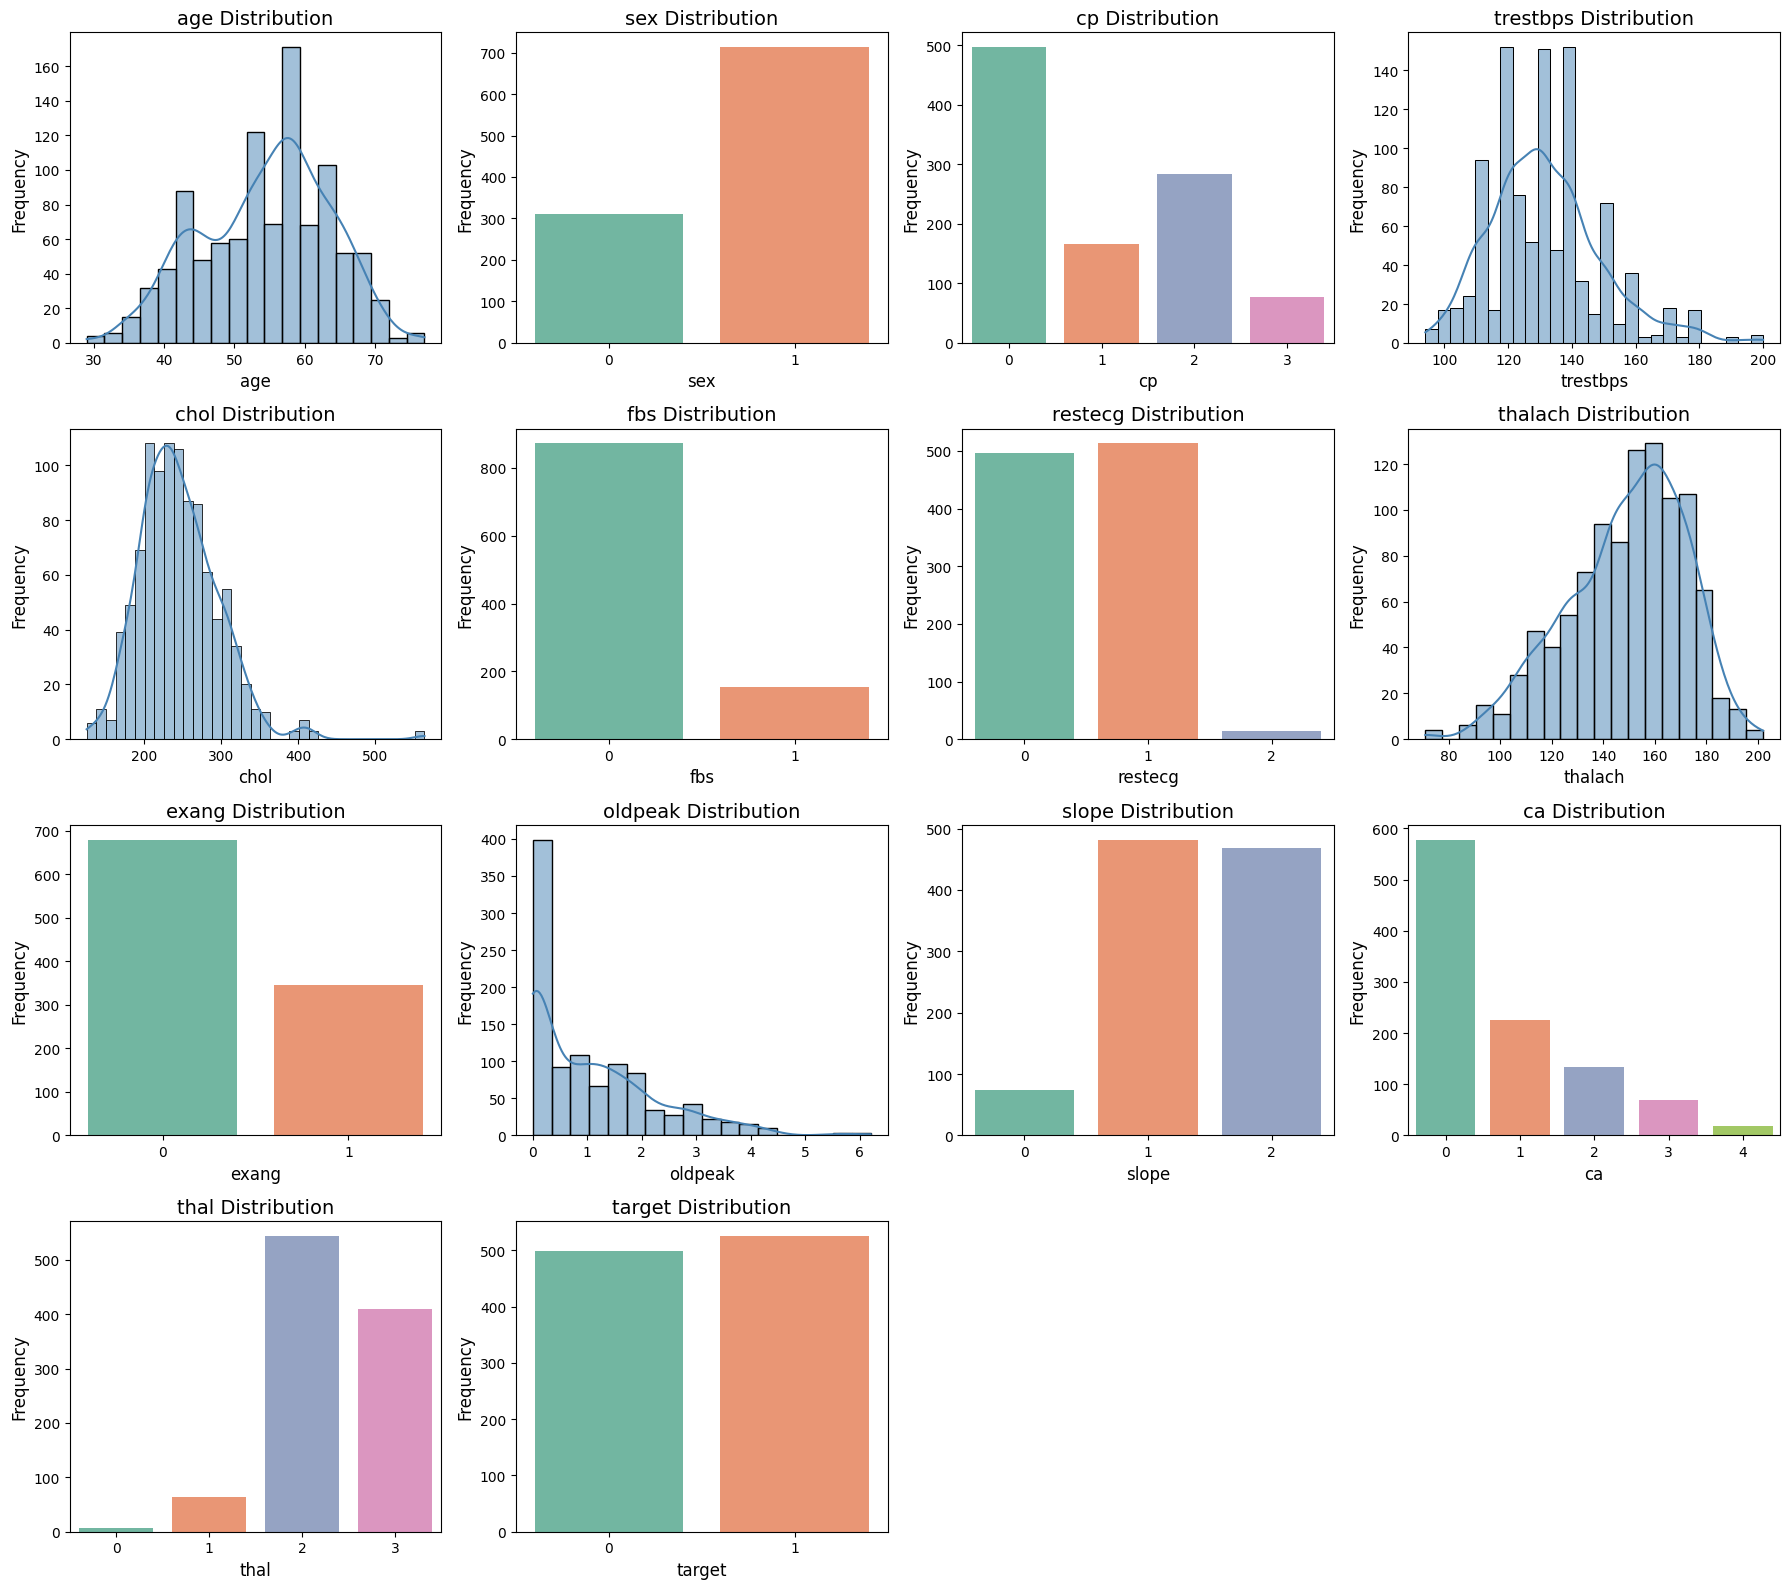

In [58]:
numerical_features = df.columns  # All columns are numeric

# Plot layout config
total_features = len(numerical_features)
cols = 4
rows = -(-total_features // cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))
axes = axes.flatten()

# Plot all numeric features using histogram (with KDE for continuous)
for idx, feature in enumerate(numerical_features):
    # Discrete or binary features: use countplot
    if df[feature].nunique() < 10:
        sns.countplot(x=df[feature], ax=axes[idx], palette="Set2")
    else:
        sns.histplot(df[feature], kde=True, ax=axes[idx], color="steelblue")

    axes[idx].set_title(f'{feature} Distribution', fontsize=14)
    axes[idx].set_ylabel("Frequency", fontsize=12)
    axes[idx].set_xlabel(feature, fontsize=12)

# Remove extra axes (if any)
for i in range(total_features, len(axes)):
    fig.delaxes(axes[i])

# Save and show
plt.tight_layout()
plt.savefig("feature_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

### Outlers

In [59]:
df1 = df.copy()

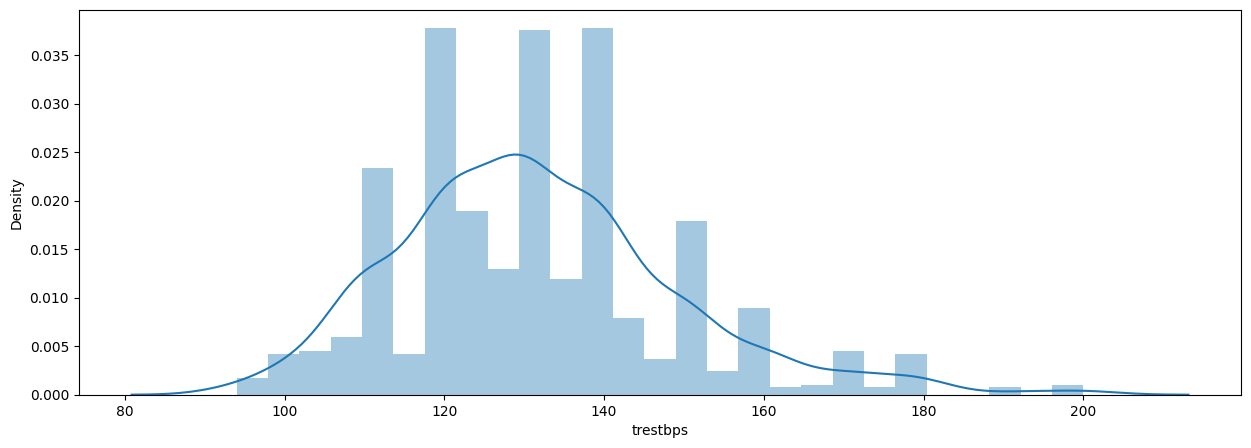

____________________________________________________________________________________________________
skewness in age column : 0.7397682260500738


In [60]:
plt.figure(figsize = (15,5))
sns.distplot(df1["trestbps"], kde = True)

plt.show()
print("_"*100)
print("skewness in age column :",df1["trestbps"].skew());

In [61]:
print("Highest allowed",df1['trestbps'].mean() + 3*df1['trestbps'].std())
print("Lowest allowed",df1['trestbps'].mean() - 3*df1['trestbps'].std())

Highest allowed 184.1618613332024
Lowest allowed 79.06155330094396


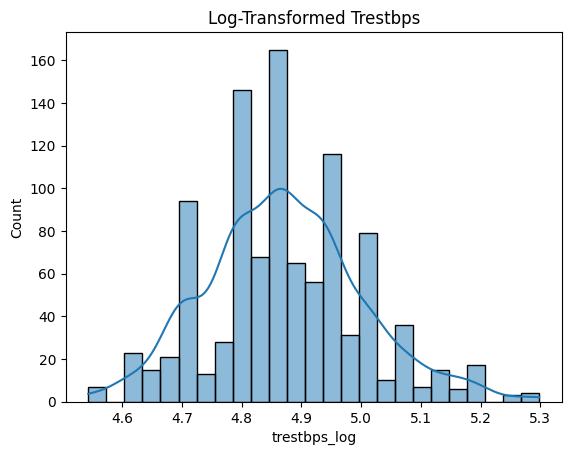

In [62]:
df1['trestbps_log'] = np.log(df1['trestbps'])

sns.histplot(df1['trestbps_log'], kde=True)
plt.title('Log-Transformed Trestbps')
plt.show()


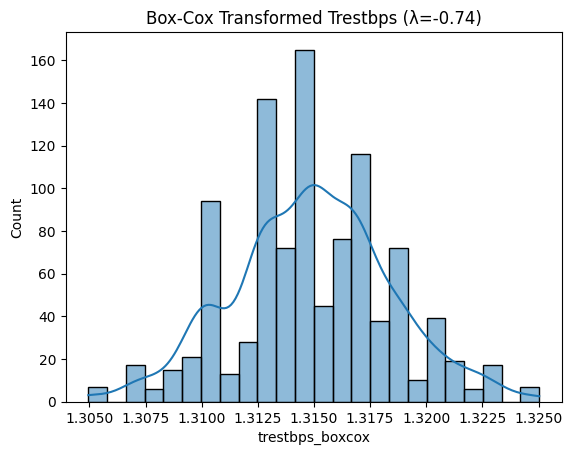

In [63]:
# Must have all values > 0
from scipy.stats import boxcox

df1['trestbps_boxcox'], fitted_lambda = boxcox(df1['trestbps'])

sns.histplot(df1['trestbps_boxcox'], kde=True)
plt.title(f'Box-Cox Transformed Trestbps (λ={fitted_lambda:.2f})')
plt.show()


In [64]:
print("Original skew:", df1['trestbps'].skew())
print("Log skew:", df1['trestbps_log'].skew())
print("Box-Cox skew:", df1['trestbps_boxcox'].skew())


Original skew: 0.7397682260500738
Log skew: 0.30184962112447944
Box-Cox skew: -0.002217829105704599


In [65]:
df1['trestbps'] = df1['trestbps_boxcox']
df1.drop(columns=['trestbps_log', 'trestbps_boxcox'], inplace=True)

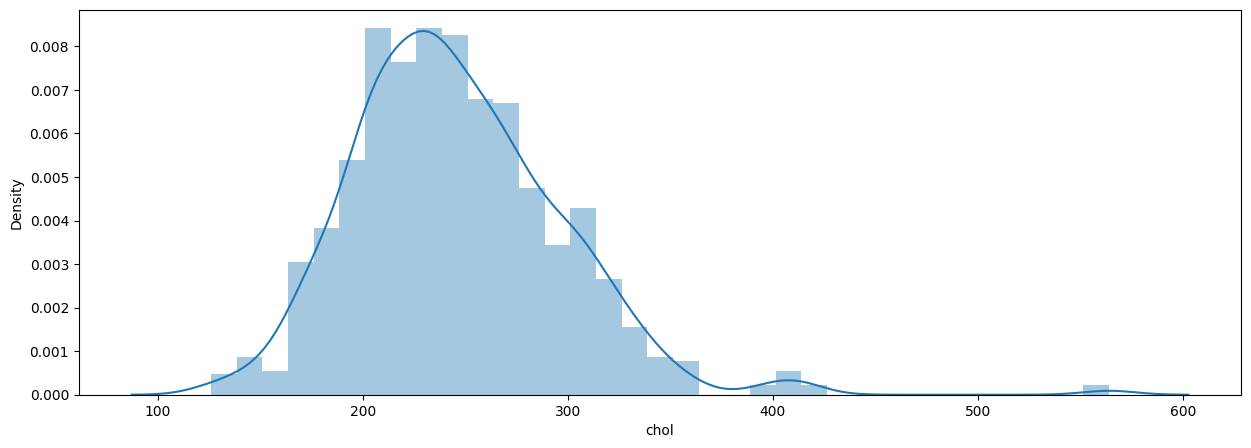

____________________________________________________________________________________________________
skewness in age column : 1.0740727783354815


In [66]:
plt.figure(figsize = (15,5))
sns.distplot(df1["chol"], kde = True)

plt.show()
print("_"*100)
print("skewness in age column :",df1["chol"].skew());

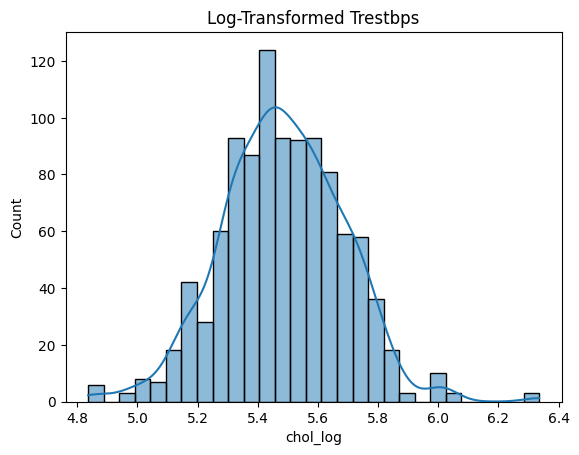

In [67]:
df1['chol_log'] = np.log(df1['chol'])

sns.histplot(df1['chol_log'], kde=True)
plt.title('Log-Transformed Trestbps')
plt.show()


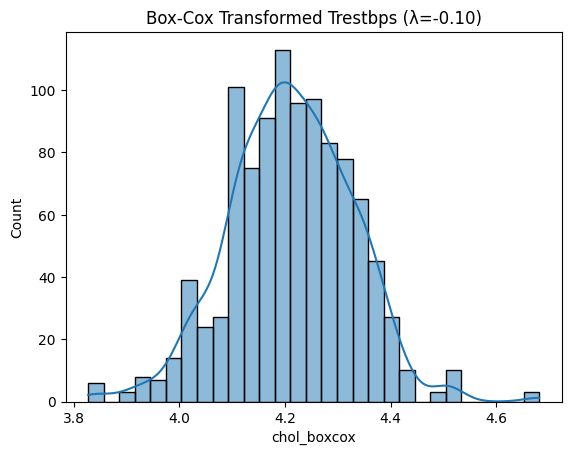

In [68]:
# Must have all values > 0
from scipy.stats import boxcox

df1['chol_boxcox'], fitted_lambda = boxcox(df1['chol'])

sns.histplot(df1['chol_boxcox'], kde=True)
plt.title(f'Box-Cox Transformed Trestbps (λ={fitted_lambda:.2f})')
plt.show()


In [69]:
print("Original skew:", df1['chol'].skew())
print("Log skew:", df1['chol_log'].skew())
print("Box-Cox skew:", df1['chol_boxcox'].skew())

Original skew: 1.0740727783354815
Log skew: 0.0788225500014389
Box-Cox skew: -0.004715014199600071


In [70]:
df1['chol'] = df1['chol_boxcox']
df1.drop(columns=['chol_log', 'chol_boxcox'], inplace=True)

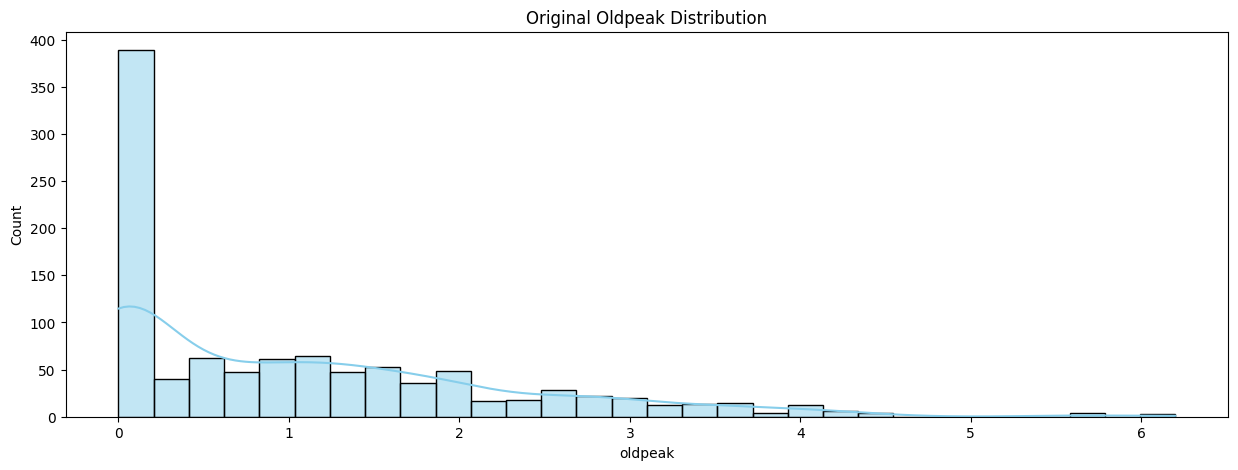

____________________________________________________________________________________________________
Skewness in oldpeak column: 1.2108993882065335


In [71]:
plt.figure(figsize=(15, 5))
sns.histplot(df1["oldpeak"], kde=True, bins=30, color="skyblue")
plt.title('Original Oldpeak Distribution')
plt.show()

print("_" * 100)
print("Skewness in oldpeak column:", df1["oldpeak"].skew())

In [72]:
print("Highest allowed:", df1['oldpeak'].mean() + 3 * df1['oldpeak'].std())
print("Lowest allowed:", df1['oldpeak'].mean() - 3 * df1['oldpeak'].std())

Highest allowed: 4.59667196057247
Lowest allowed: -2.453647570328567


In [73]:
if (df1['oldpeak'] <= 0).any():
    shift = abs(df1['oldpeak'].min()) + 1
    df1['oldpeak_log'] = np.log(df1['oldpeak'] + shift)
else:
    df1['oldpeak_log'] = np.log(df1['oldpeak'])

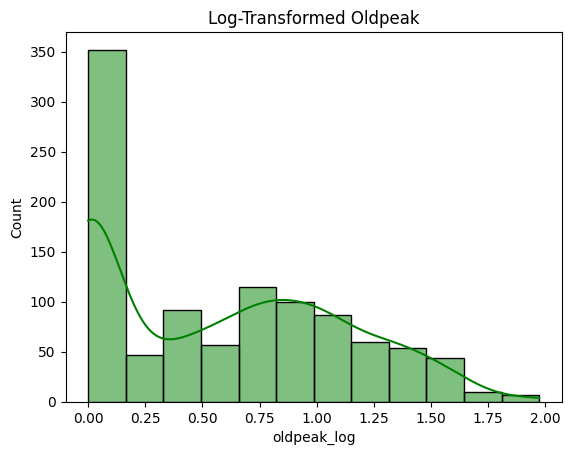

In [74]:
# Plot log-transformed
sns.histplot(df1['oldpeak_log'], kde=True, color="green")
plt.title('Log-Transformed Oldpeak')
plt.show()

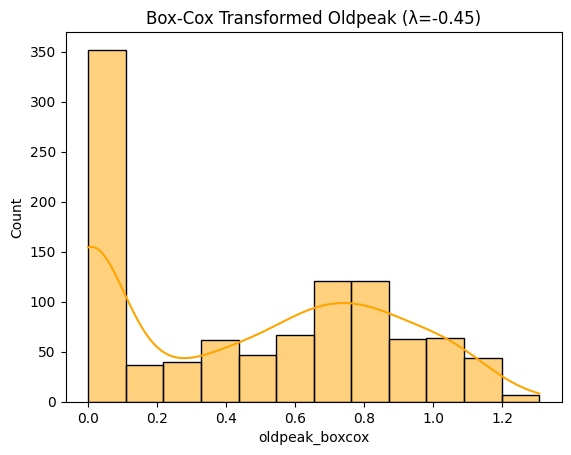

In [75]:
if (df1['oldpeak'] <= 0).any():
    df1['oldpeak_boxcox'], lambda_oldpeak = boxcox(df1['oldpeak'] + shift)
else:
    df1['oldpeak_boxcox'], lambda_oldpeak = boxcox(df1['oldpeak'])

sns.histplot(df1['oldpeak_boxcox'], kde=True, color="orange")
plt.title(f'Box-Cox Transformed Oldpeak (λ={lambda_oldpeak:.2f})')
plt.show()

In [76]:
print("Original skew:", df1['oldpeak'].skew())
print("Log skew:", df1['oldpeak_log'].skew())
print("Box-Cox skew:", df1['oldpeak_boxcox'].skew())

Original skew: 1.2108993882065335
Log skew: 0.35790878702158047
Box-Cox skew: 0.11061262028954849


In [77]:
df1['oldpeak'] = df1['oldpeak_boxcox']
df1.drop(columns=['oldpeak_log', 'oldpeak_boxcox'], inplace=True)

### Check the dataset Balance or Imbalance

In [78]:
print(df1['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


### Box-plot

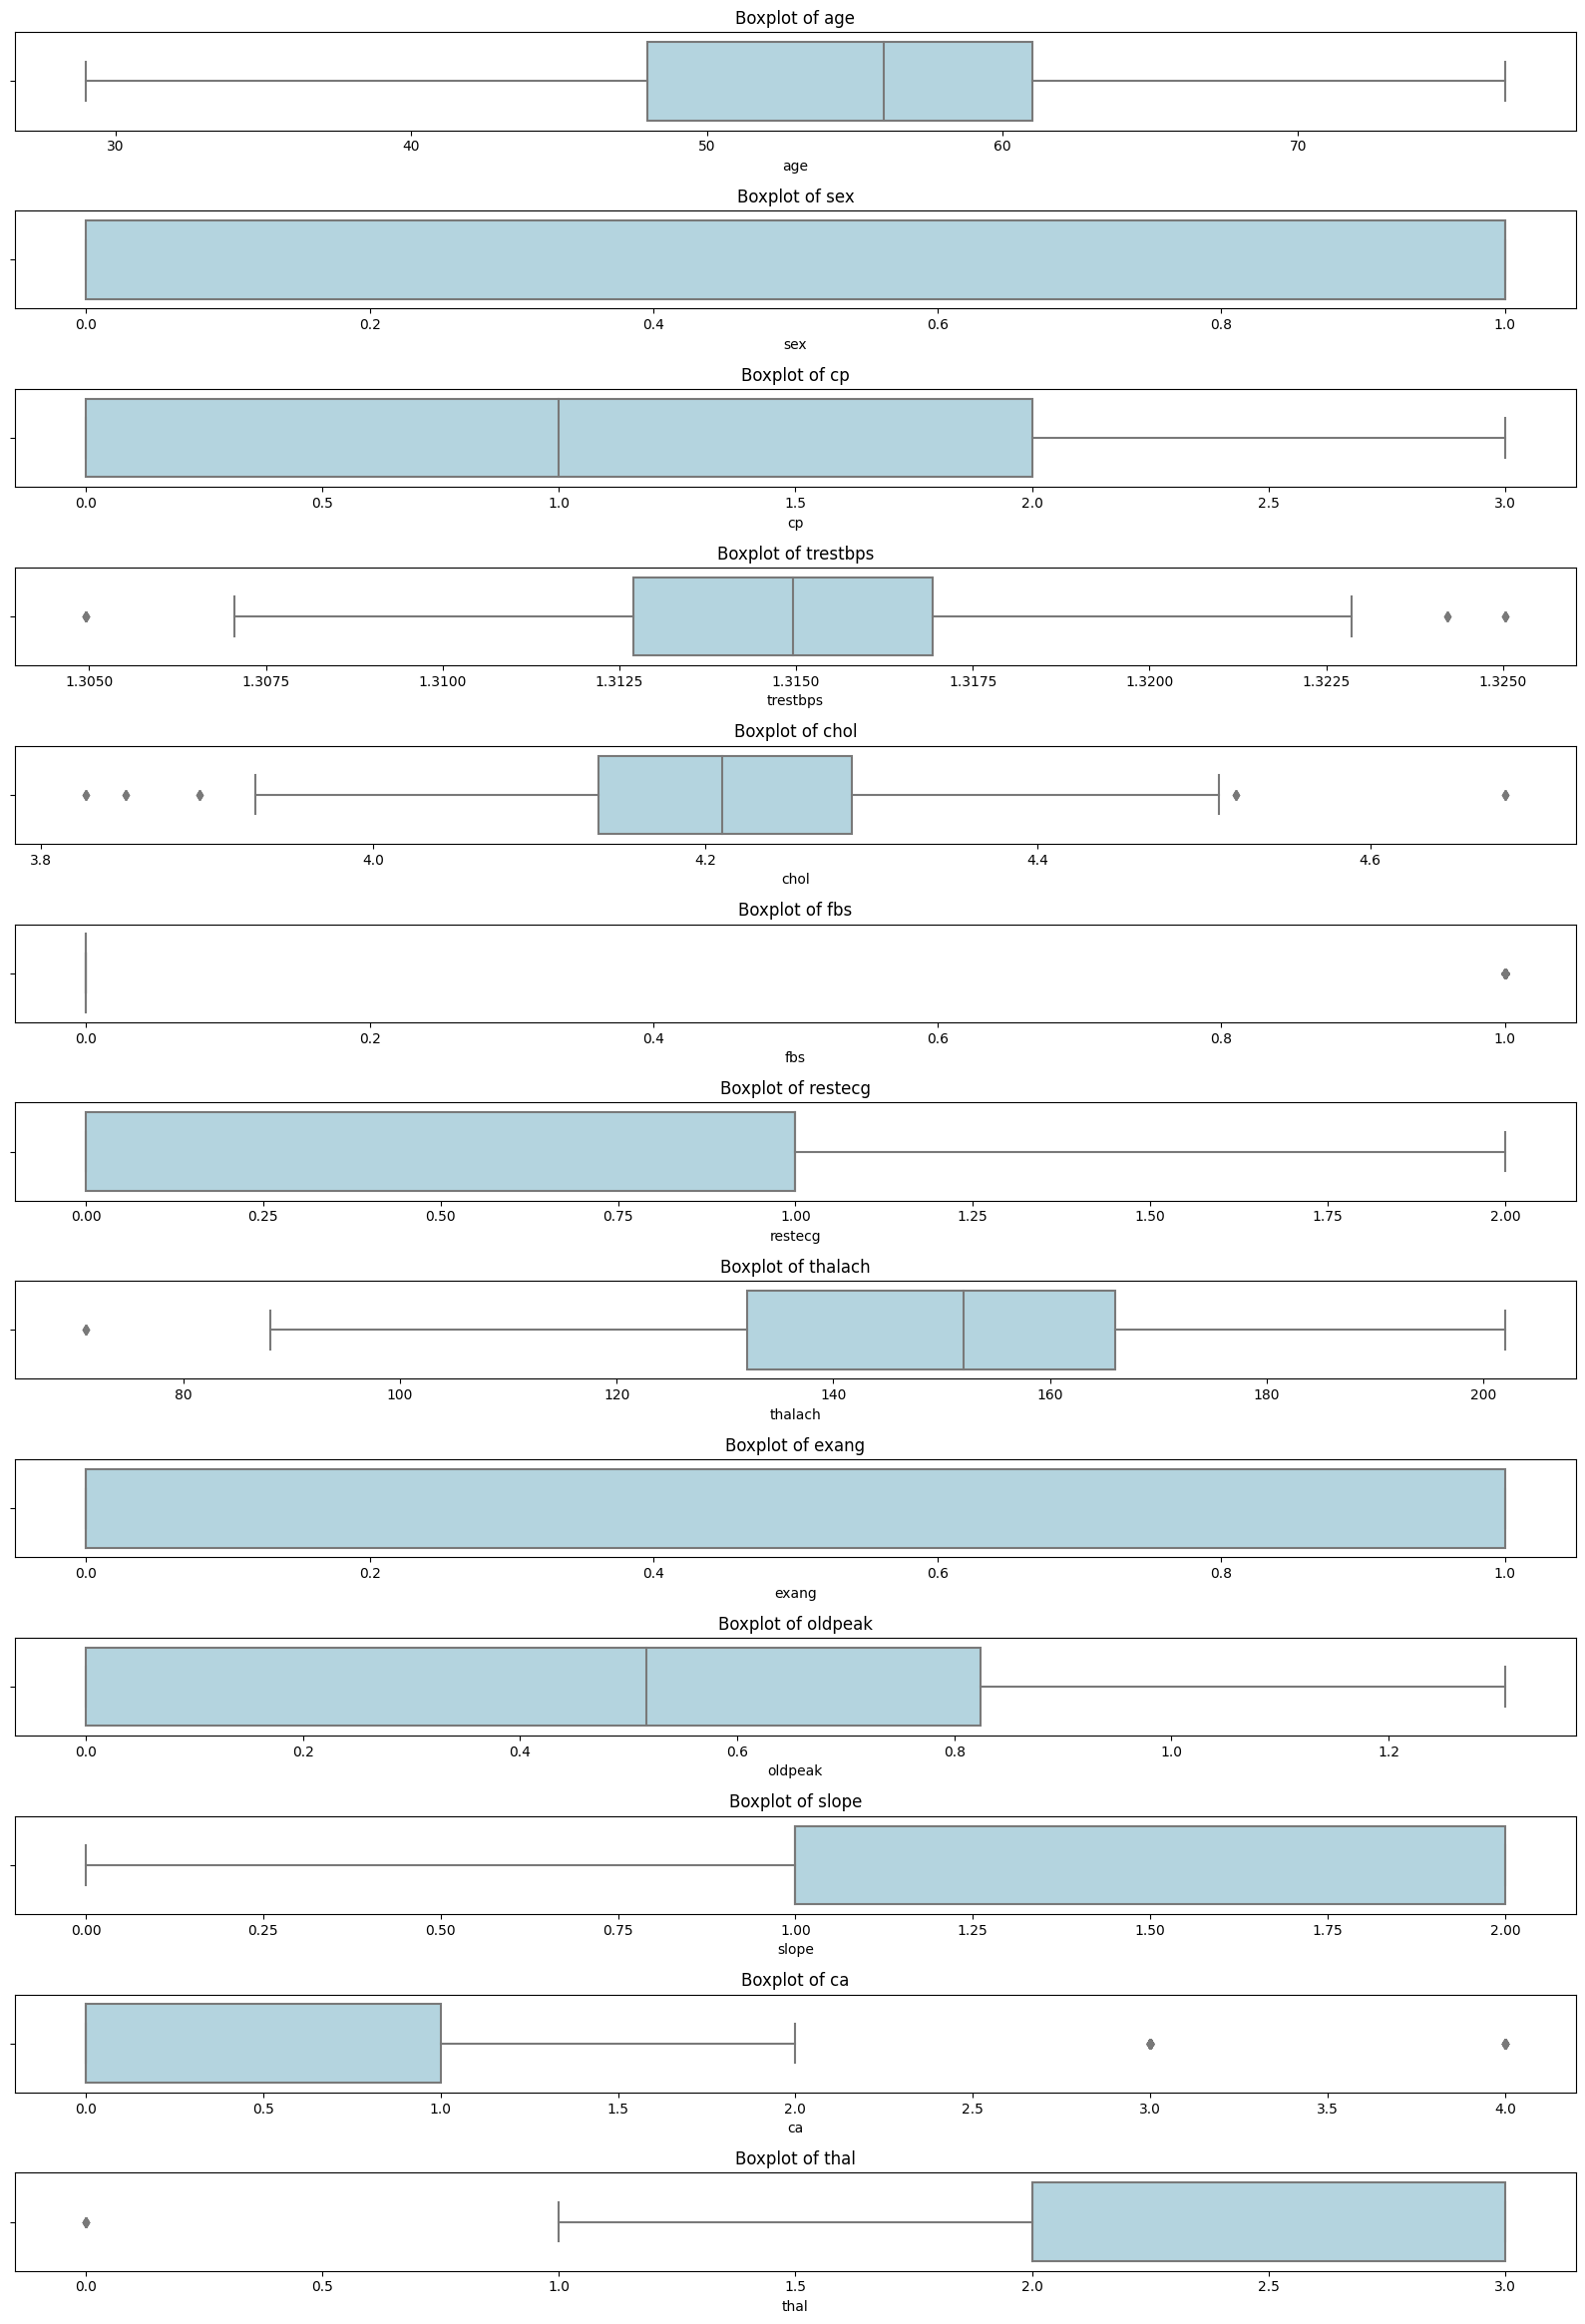

In [79]:
# Exclude the 'target' column
features = df1.drop(columns=['target']).columns

# Set up the plot grid
plt.figure(figsize=(16, len(features) * 1.8))  # Dynamic height based on number of features

for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df1[col], color='lightblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

### Train- Test Split

In [80]:
drop_element = ['target']
y = df1['target']
X = df1.drop(drop_element, axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

### T-SNE plot

In [82]:
X_for_sne = X.copy()

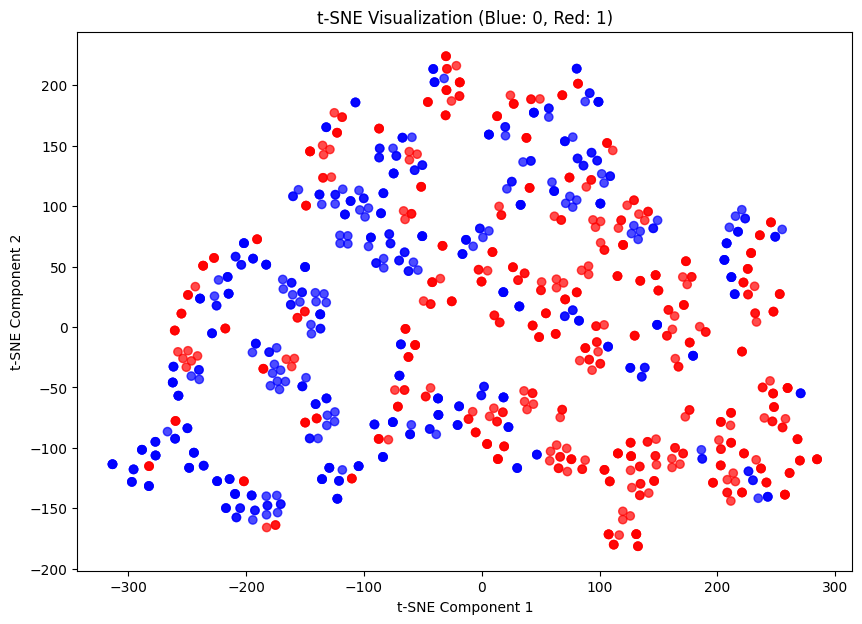

In [83]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
#X_tsne = tsne.fit_transform(X_for_sne_sca[:2000])  # Using a subset (2000 samples) for speed
X_tsne = tsne.fit_transform(X_for_sne)

#colors = np.where(y[:2000] == 0, 'blue', 'red')
colors = np.where(y == 0, 'blue', 'red')

# Plot t-SNE results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.7)

plt.title("t-SNE Visualization (Blue: 0, Red: 1)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

### Define Model

In [84]:
models = [
    ("Logistic Regression", LogisticRegression(
    )),
    
    ("Random Forest", RandomForestClassifier(
        random_state=42
    )),
    
    ("Decision Tree", DecisionTreeClassifier(
        random_state=42
    )),
    
    ("Gaussian Naive Bayes", GaussianNB()),
    
    ("XGBoost", XGBClassifier(
        random_state=42
    )),
    
    ("LightGBM", LGBMClassifier(
        verbosity=-1,
        random_state=42
    )),
    
    ("CatBoost", CatBoostClassifier(
        verbose=0,
        random_state=42
    ))
]

### With Only Model

In [85]:
for name, model in models:
    model.fit(X_train_transformed, y_train)  
    y_pred = model.predict(X_test_transformed) 
    score = accuracy_score(y_test, y_pred)  
    report = classification_report(y_test, y_pred)  
    
    # Print results
    print(f"{name} - Accuracy on test data: {score}")
    print(report)
    print("-" * 60)

Logistic Regression - Accuracy on test data: 0.8097560975609757
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205

------------------------------------------------------------
Random Forest - Accuracy on test data: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------------------------
Decision Tree - Accuracy on test data: 0.9853658536585366
              precision    recall  f1-score 

In [90]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models:
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in kf.split(X_scaled, y):
        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)

    # Final report
    print(f"{name} - Accuracy using StratifiedKFold: {accuracy_score(y_true_all, y_pred_all):.4f}")
    print(classification_report(y_true_all, y_pred_all))
    print("-" * 60)

Logistic Regression - Accuracy using StratifiedKFold: 0.8439
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       499
           1       0.82      0.89      0.85       526

    accuracy                           0.84      1025
   macro avg       0.85      0.84      0.84      1025
weighted avg       0.85      0.84      0.84      1025

------------------------------------------------------------
Random Forest - Accuracy using StratifiedKFold: 0.9961
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       499
           1       1.00      0.99      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025

------------------------------------------------------------
Decision Tree - Accuracy using StratifiedKFold: 0.9961
              precision    recall  f1-score   support

### Plot Accuracy Comperision

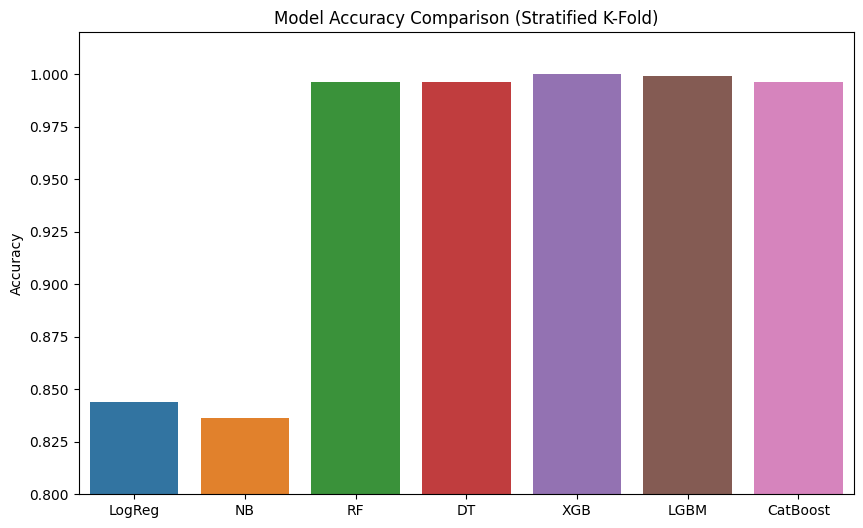

In [91]:
import matplotlib.pyplot as plt

models = ['LogReg', 'NB', 'RF', 'DT', 'XGB', 'LGBM', 'CatBoost']
accuracies = [0.8439, 0.8361, 0.9961, 0.9961, 1.0, 0.9990, 0.9961]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0.8, 1.02)
plt.title('Model Accuracy Comparison (Stratified K-Fold)')
plt.ylabel('Accuracy')
plt.show()


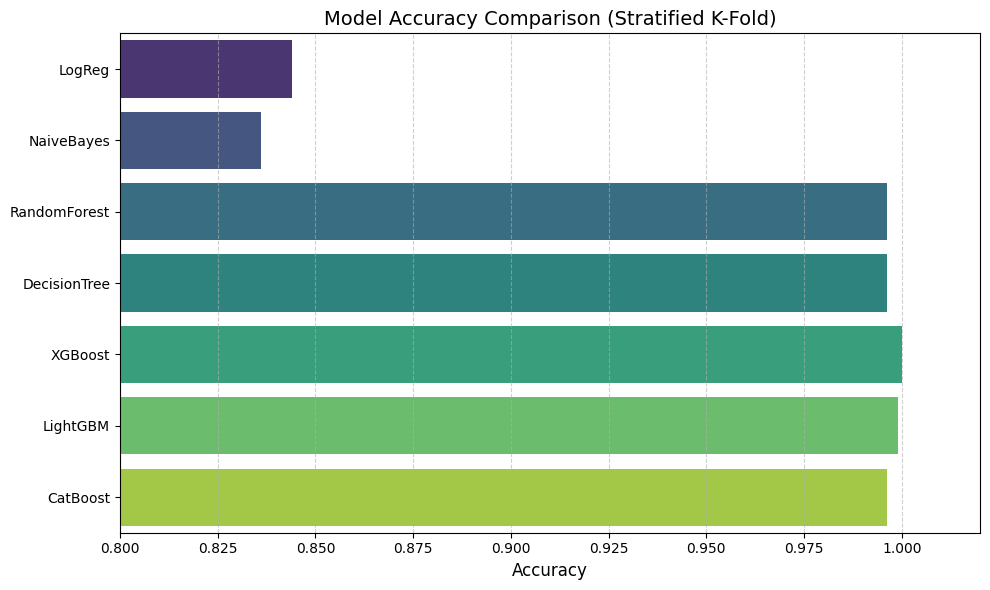

In [92]:
# Accuracy scores from your results
model_names = ['LogReg', 'NaiveBayes', 'RandomForest', 'DecisionTree', 'XGBoost', 'LightGBM', 'CatBoost']
accuracies = [0.8439, 0.8361, 0.9961, 0.9961, 1.0, 0.9990, 0.9961]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.title('Model Accuracy Comparison (Stratified K-Fold)', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)
plt.xlim(0.8, 1.02)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

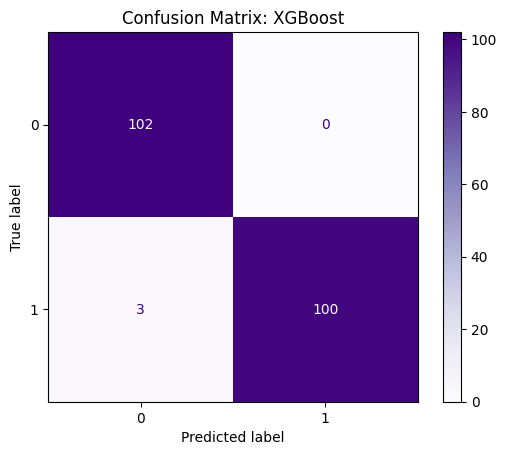

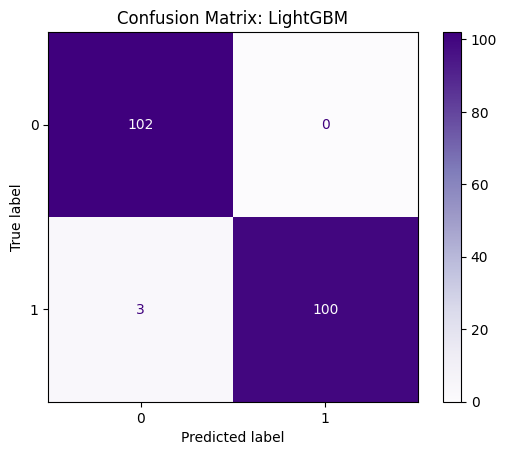

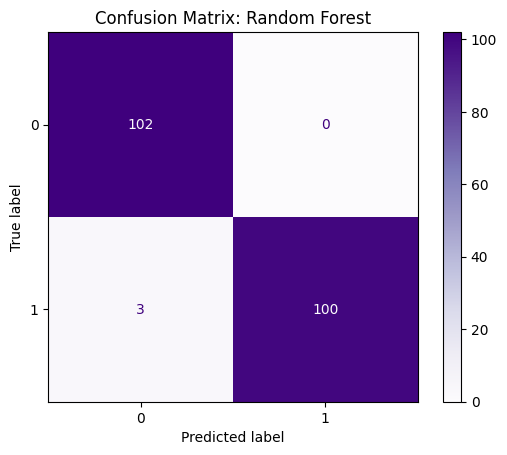

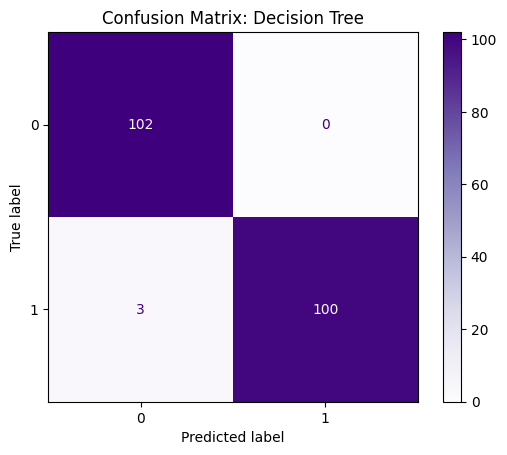

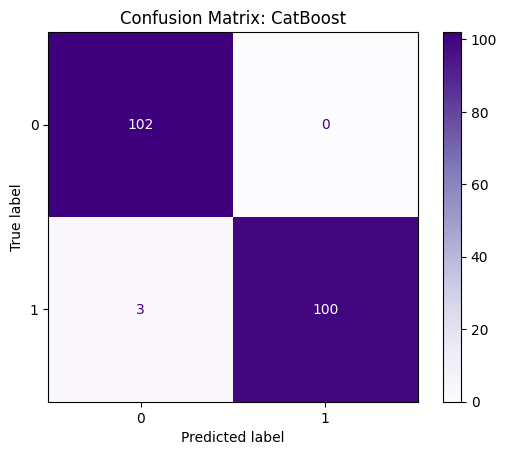

In [97]:
# Top 5 models
top_models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}


for name, model in top_models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Purples')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


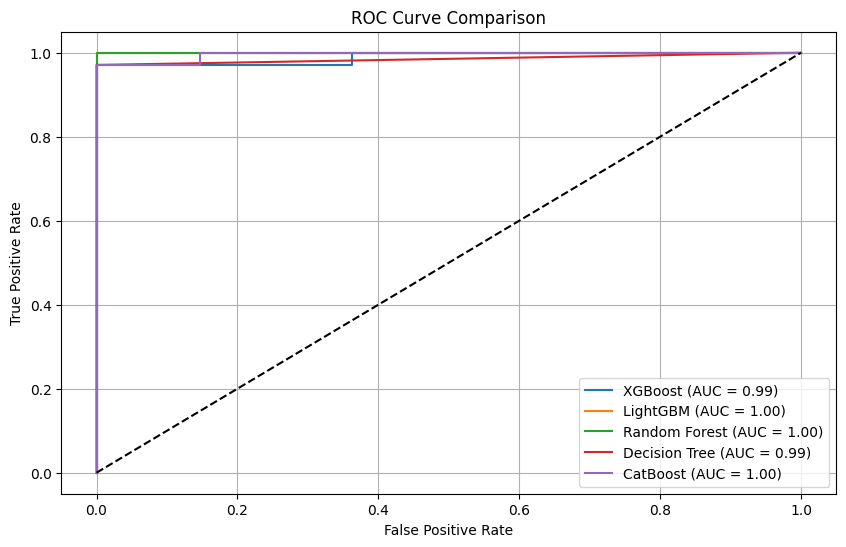

In [100]:
plt.figure(figsize=(10, 6))

for name, model in top_models.items():
    y_proba = model.predict_proba(X_test_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Hyperparameter Tune

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as rint, uniform

param_dist = {
    'n_estimators': rint(100, 300),
    'max_depth': rint(4, 12),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.8, 0.2),
    'num_leaves': rint(20, 64)
}

lgbm = LGBMClassifier(random_state=42, verbose=-1)

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,  # You can adjust this
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'learning_rate': 0.0849080237694725, 'max_depth': 8, 'n_estimators': 114, 'num_leaves': 62, 'subsample': 0.9559382000545539}
Best CV Accuracy: 0.9817073170731707


In [111]:
best_lgbm = random_search.best_estimator_

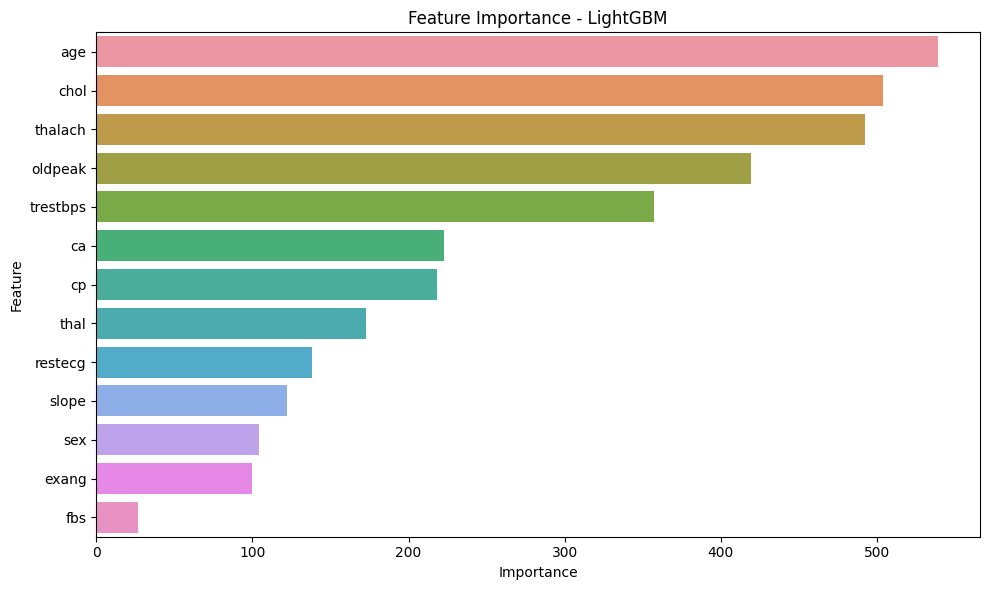

In [112]:
importances = best_lgbm.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - LightGBM')
plt.tight_layout()
plt.show()


In [114]:
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lgbm', best_lgbm)
])

pipeline.fit(X, y)

joblib.dump(pipeline, 'lgbm_pipeline.pkl')
print("Full pipeline saved as lgbm_pipeline.pkl")


Full pipeline saved as lgbm_pipeline.pkl


In [115]:
pipeline_loaded = joblib.load('lgbm_pipeline.pkl')
prediction = pipeline_loaded.predict([X.iloc[0]])  
print("Prediction:", prediction)

Prediction: [0]


In [116]:
pipeline_loaded.predict(X.iloc[:5])

array([0, 0, 0, 0, 0])

In [117]:
pipeline_loaded.predict_proba(X.iloc[:1])

array([[9.99185698e-01, 8.14302139e-04]])

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = pipeline_loaded.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[102   0]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [119]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [120]:
import shap

model = best_lgbm  # or random_search.best_estimator_

explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test)

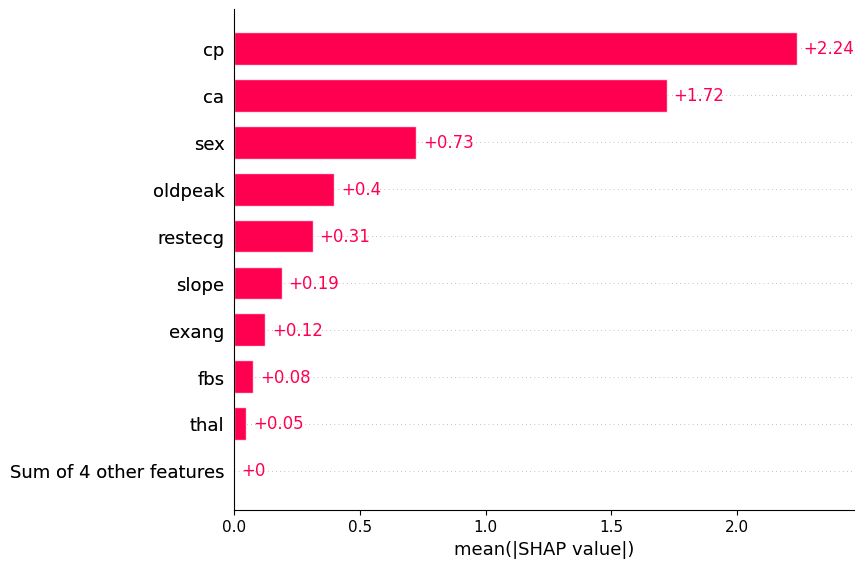

In [121]:
shap.plots.bar(shap_values)

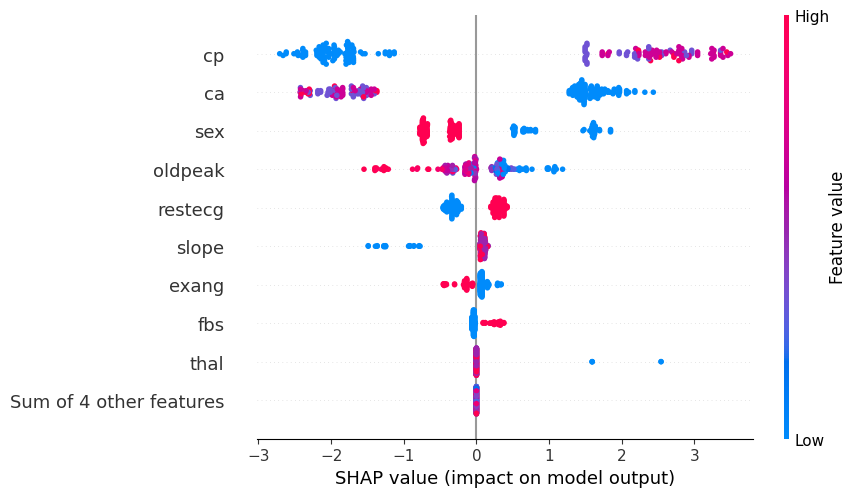

In [122]:
shap.plots.beeswarm(shap_values)